# 📊 Análise Exploratória dos Dados - Fibrilação Atrial

## Objetivo
Este notebook realiza uma análise exploratória completa das **features extraídas** dos sinais de ECG de Fibrilação Atrial (FA) do dataset AFTDB.

## O que vamos fazer:
1. ✅ Carregar o arquivo `features.csv` gerado pelo script de extração
2. 📋 Explorar a estrutura dos dados (quantos registros, quais colunas)
3. 📈 Calcular estatísticas descritivas (média, desvio padrão, etc.)
4. 📊 Visualizar distribuições das features principais
5. 🔗 Analisar correlações entre variáveis
6. 💡 Identificar padrões característicos da Fibrilação Atrial

---

**Dataset**: AFTDB (Atrial Fibrillation Termination Database)  
**Total de registros esperados**: 80 (learning-set: 30, test-set-a: 30, test-set-b: 20)  
**Classe**: Todos são Fibrilação Atrial (label = 1)

## 1️⃣ Importar Bibliotecas Necessárias

Vamos importar todas as bibliotecas que precisaremos para a análise:

In [30]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2️⃣ Carregar Dados das Features

Vamos carregar o arquivo CSV com as features extraídas de todos os registros de ECG.

In [31]:
# Caminho para o arquivo de features
features_path = '../data/processed/features.csv'

# Carregar dados
df = pd.read_csv(features_path)

print(f"✅ Dados carregados com sucesso!")
print(f"📊 Total de registros: {len(df)}")
print(f"📋 Total de features: {len(df.columns)}")

✅ Dados carregados com sucesso!
📊 Total de registros: 80
📋 Total de features: 19


## 3️⃣ Explorar a Estrutura dos Dados

Vamos examinar as primeiras linhas e entender a estrutura do dataset.

In [32]:
# Visualizar as primeiras linhas
print("📋 PRIMEIRAS 5 LINHAS DO DATASET:")
print("="*80)
df.head()

📋 PRIMEIRAS 5 LINHAS DO DATASET:


,record_name,label,num_beats,num_rr_intervals,sampling_freq,rr_mean,rr_std,rr_median,rr_min,rr_max,rr_cv,rr_rmssd,rr_range,rr_percentile_25,rr_percentile_75,rr_iqr,mean_hr_bpm,dataset,subset
0,t08,1,107,106,128,0.559257,0.139593,0.523438,0.335938,1.023438,24.960422,0.180349,0.687500,0.447266,0.638672,0.191406,107.285187,aftdb,learning-set
1,t09,1,87,86,128,0.688772,0.180927,0.730469,0.398438,0.992188,26.268037,0.136841,0.593750,0.500000,0.857422,0.357422,87.111580,aftdb,learning-set
2,n08,1,87,86,128,0.688045,0.169190,0.671875,0.453125,1.132812,24.589931,0.248100,0.679688,0.541016,0.763672,0.222656,87.203591,aftdb,learning-set
3,n09,1,75,74,128,0.804371,0.112955,0.769531,0.609375,1.109375,14.042593,0.166764,0.500000,0.720703,0.882812,0.162109,74.592466,aftdb,learning-set
4,s08,1,103,102,128,0.580270,0.114460,0.554688,0.398438,0.937500,19.725399,0.172631,0.539062,0.492188,0.646484,0.154297,103.400211,aftdb,learning-set


In [33]:
# Informações gerais sobre o dataset
print("\n📊 INFORMAÇÕES GERAIS DO DATASET:")
print("="*80)
df.info()


📊 INFORMAÇÕES GERAIS DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_name       80 non-null     object 
 1   label             80 non-null     int64  
 2   num_beats         80 non-null     int64  
 3   num_rr_intervals  80 non-null     int64  
 4   sampling_freq     80 non-null     int64  
 5   rr_mean           80 non-null     float64
 6   rr_std            80 non-null     float64
 7   rr_median         80 non-null     float64
 8   rr_min            80 non-null     float64
 9   rr_max            80 non-null     float64
 10  rr_cv             80 non-null     float64
 11  rr_rmssd          80 non-null     float64
 12  rr_range          80 non-null     float64
 13  rr_percentile_25  80 non-null     float64
 14  rr_percentile_75  80 non-null     float64
 15  rr_iqr            80 non-null     float64
 16  mean_hr_bpm 

In [34]:
# Distribuição por subset
print("\n📁 DISTRIBUIÇÃO DOS REGISTROS POR SUBSET:")
print("="*80)
print(df['subset'].value_counts())
print(f"\nTotal: {df['subset'].value_counts().sum()} registros")


📁 DISTRIBUIÇÃO DOS REGISTROS POR SUBSET:
subset
learning-set    30
test-set-a      30
test-set-b      20
Name: count, dtype: int64

Total: 80 registros


## 4️⃣ Análise Estatística das Features

Vamos calcular estatísticas descritivas das principais features relacionadas aos intervalos R-R.

In [35]:
# Selecionar features numéricas mais importantes
features_importantes = [
    'rr_mean', 'rr_std', 'rr_median', 'rr_min', 'rr_max',
    'rr_cv', 'rr_rmssd', 'rr_range', 'mean_hr_bpm'
]

# Estatísticas descritivas
print("📈 ESTATÍSTICAS DESCRITIVAS DAS FEATURES PRINCIPAIS:")
print("="*100)
df[features_importantes].describe().round(4)

📈 ESTATÍSTICAS DESCRITIVAS DAS FEATURES PRINCIPAIS:


,rr_mean,rr_std,rr_median,rr_min,rr_max,rr_cv,rr_rmssd,rr_range,mean_hr_bpm
count,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000
mean,0.6800,0.1462,0.6602,0.4376,1.1453,21.4844,0.1984,0.7077,95.0093
std,0.1783,0.0555,0.1801,0.1212,0.3309,5.5759,0.0816,0.2777,27.6550
min,0.3254,0.0522,0.3047,0.2344,0.5859,11.7950,0.0768,0.3125,49.4767
25%,0.5468,0.1096,0.5156,0.3516,0.9180,17.5580,0.1499,0.5059,73.1816
50%,0.6804,0.1365,0.6777,0.4375,1.0938,21.0502,0.1795,0.6445,88.1999
75%,0.8199,0.1682,0.7920,0.4863,1.3066,25.0351,0.2277,0.8184,109.7297
max,1.2127,0.2936,1.1875,0.8750,2.1484,38.9040,0.4243,1.7109,184.3684


In [36]:
# Análise específica das features de variabilidade (MAIS IMPORTANTES para FA)
print("\n⭐ FEATURES DE VARIABILIDADE (Principais para detectar FA):")
print("="*100)

variability_features = ['rr_std', 'rr_cv', 'rr_rmssd']

for feature in variability_features:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    print(f"\n{feature.upper()}:")
    print(f"  • Média: {mean_val:.4f}")
    print(f"  • Desvio Padrão: {std_val:.4f}")
    print(f"  • Mín-Máx: [{min_val:.4f}, {max_val:.4f}]")

print("\n💡 INTERPRETAÇÃO:")
print("  • CV (Coeficiente de Variação) > 10% indica alta irregularidade (típico de FA)")
print("  • RMSSD alto indica grande variabilidade entre batimentos consecutivos")
print("  • Desvio Padrão alto confirma a irregularidade do ritmo")


⭐ FEATURES DE VARIABILIDADE (Principais para detectar FA):

RR_STD:
  • Média: 0.1462
  • Desvio Padrão: 0.0555
  • Mín-Máx: [0.0522, 0.2936]

RR_CV:
  • Média: 21.4844
  • Desvio Padrão: 5.5759
  • Mín-Máx: [11.7950, 38.9040]

RR_RMSSD:
  • Média: 0.1984
  • Desvio Padrão: 0.0816
  • Mín-Máx: [0.0768, 0.4243]

💡 INTERPRETAÇÃO:
  • CV (Coeficiente de Variação) > 10% indica alta irregularidade (típico de FA)
  • RMSSD alto indica grande variabilidade entre batimentos consecutivos
  • Desvio Padrão alto confirma a irregularidade do ritmo


## 5️⃣ Visualização das Distribuições

Vamos criar gráficos para entender melhor como as features estão distribuídas.

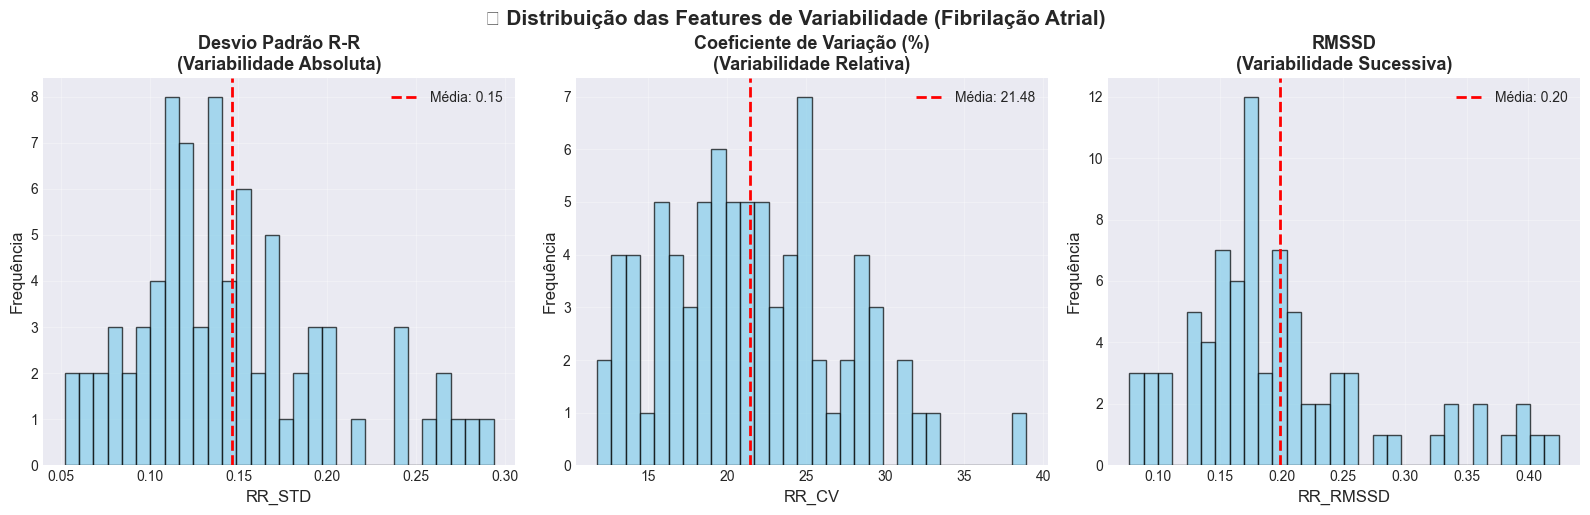

💡 Observe que:
  • A maioria dos registros tem CV > 10% (alta irregularidade)
  • Há variação entre os pacientes, mas todos mostram algum grau de irregularidade


In [37]:
# Histogramas das 3 features mais importantes
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

features_to_plot = ['rr_std', 'rr_cv', 'rr_rmssd']
titles = [
    'Desvio Padrão R-R\n(Variabilidade Absoluta)',
    'Coeficiente de Variação (%)\n(Variabilidade Relativa)',
    'RMSSD\n(Variabilidade Sucessiva)'
]

for i, (feature, title) in enumerate(zip(features_to_plot, titles)):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df[feature].mean():.2f}')
    axes[i].set_xlabel(feature.upper(), fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].set_title(title, fontsize=13, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 Distribuição das Features de Variabilidade (Fibrilação Atrial)', 
             fontsize=15, fontweight='bold', y=1.02)
plt.show()

print("💡 Observe que:")
print("  • A maioria dos registros tem CV > 10% (alta irregularidade)")
print("  • Há variação entre os pacientes, mas todos mostram algum grau de irregularidade")

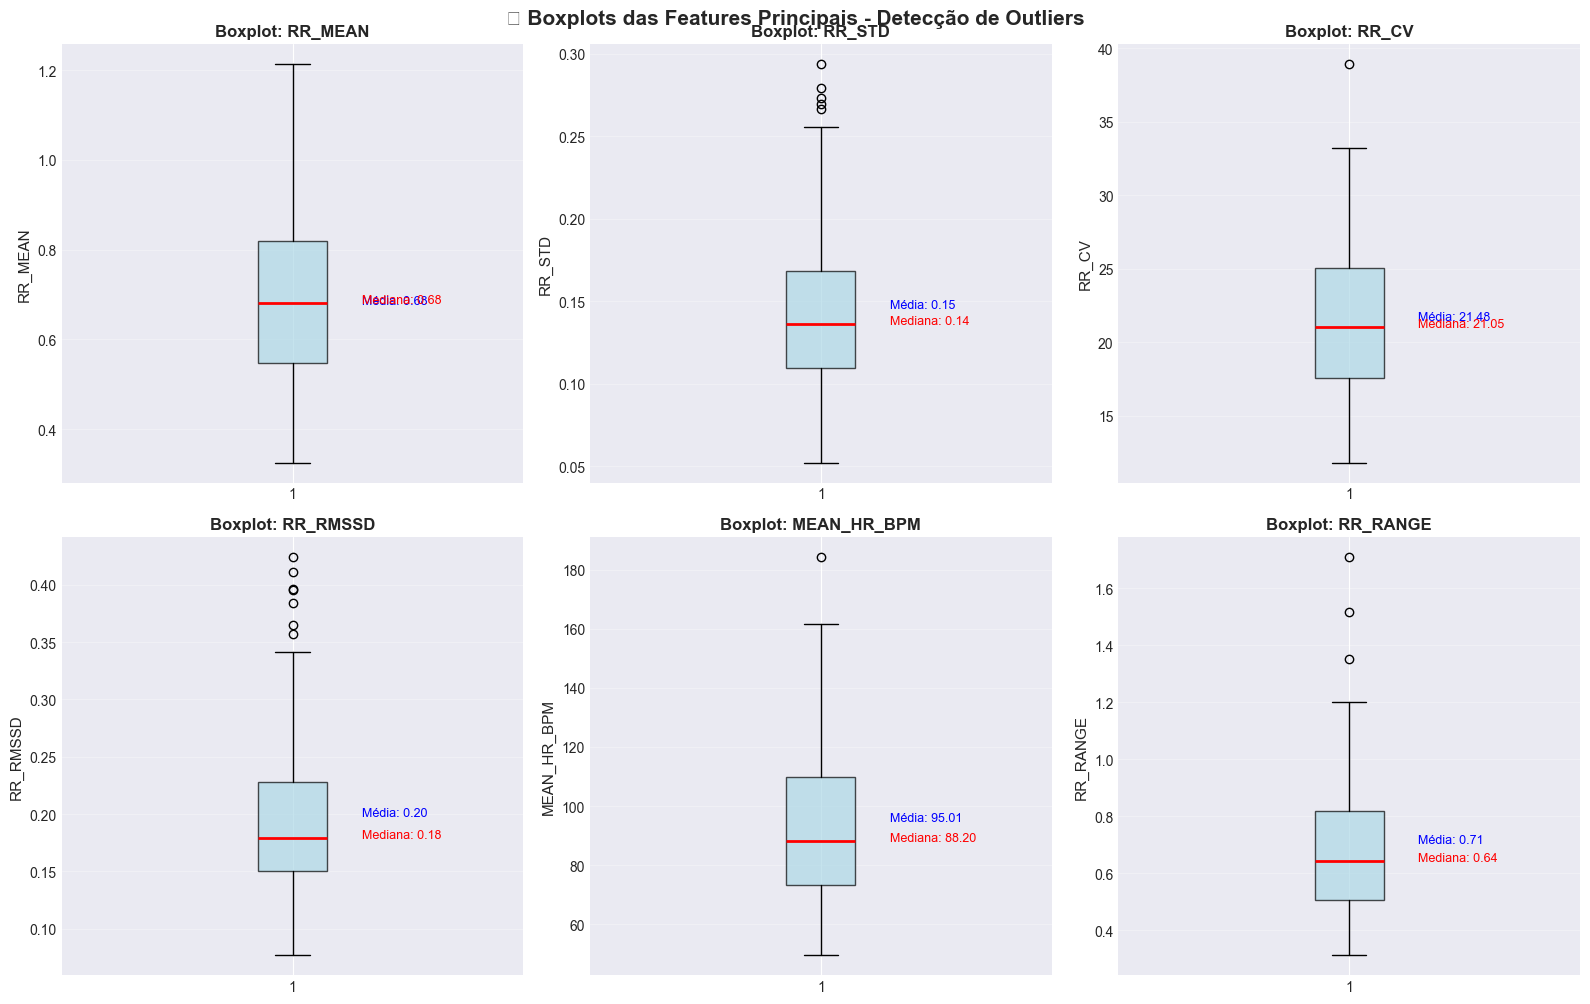

💡 Os boxplots ajudam a identificar:
  • Valores extremos (outliers)
  • A mediana (linha vermelha) vs média
  • A distribuição dos quartis


In [38]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

features_for_boxplot = ['rr_mean', 'rr_std', 'rr_cv', 'rr_rmssd', 'mean_hr_bpm', 'rr_range']

for i, feature in enumerate(features_for_boxplot):
    axes[i].boxplot(df[feature], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_ylabel(feature.upper(), fontsize=11)
    axes[i].set_title(f'Boxplot: {feature.upper()}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Adicionar estatísticas
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].text(1.15, mean_val, f'Média: {mean_val:.2f}', fontsize=9, color='blue')
    axes[i].text(1.15, median_val, f'Mediana: {median_val:.2f}', fontsize=9, color='red')

plt.tight_layout()
plt.suptitle('📦 Boxplots das Features Principais - Detecção de Outliers', 
             fontsize=15, fontweight='bold', y=1.00)
plt.show()

print("💡 Os boxplots ajudam a identificar:")
print("  • Valores extremos (outliers)")
print("  • A mediana (linha vermelha) vs média")
print("  • A distribuição dos quartis")

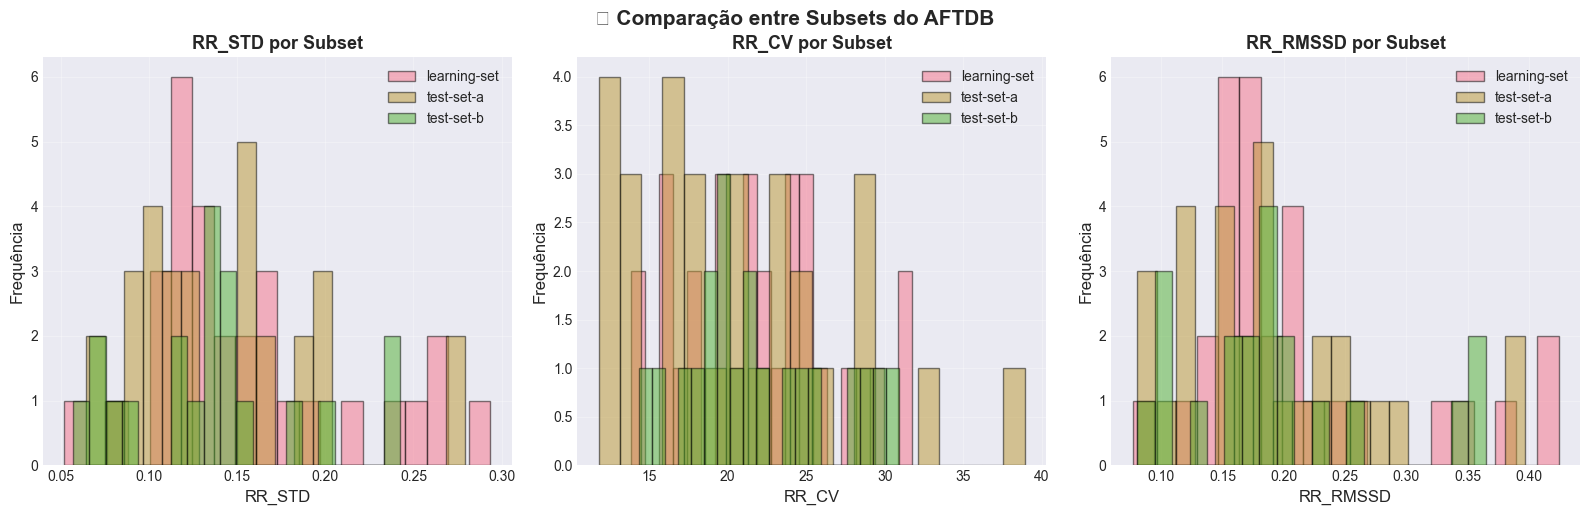

💡 Esta visualização mostra se os 3 subsets têm distribuições similares
  • Idealmente, as distribuições devem ser parecidas (dados homogêneos)


In [39]:
# Comparar distribuições entre subsets
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, feature in enumerate(['rr_std', 'rr_cv', 'rr_rmssd']):
    for subset in df['subset'].unique():
        subset_data = df[df['subset'] == subset][feature]
        axes[i].hist(subset_data, bins=20, alpha=0.5, label=subset, edgecolor='black')
    
    axes[i].set_xlabel(feature.upper(), fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].set_title(f'{feature.upper()} por Subset', fontsize=13, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 Comparação entre Subsets do AFTDB', fontsize=15, fontweight='bold', y=1.02)
plt.show()

print("💡 Esta visualização mostra se os 3 subsets têm distribuições similares")
print("  • Idealmente, as distribuições devem ser parecidas (dados homogêneos)")

## 6️⃣ Análise de Correlação entre Features

Vamos ver como as features se relacionam entre si usando uma matriz de correlação.

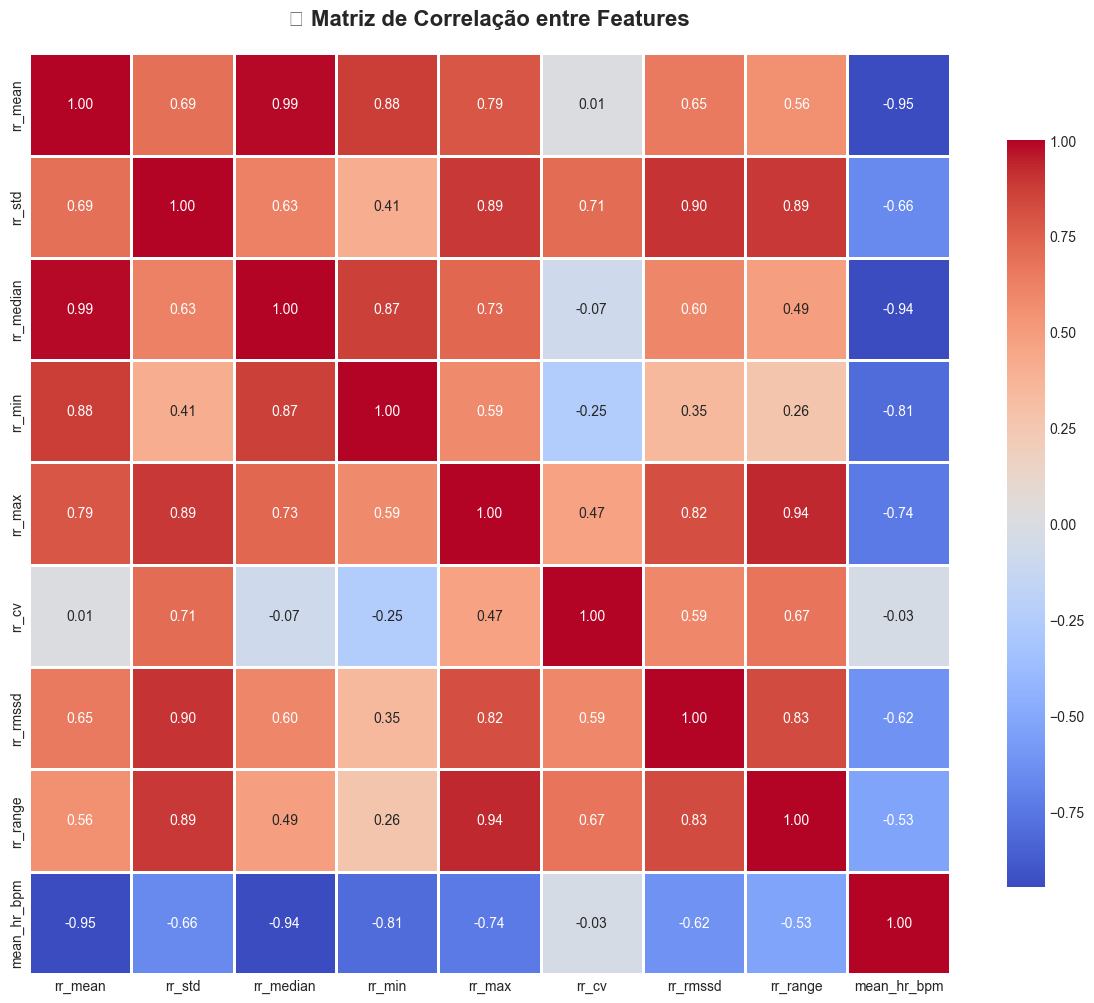

💡 INTERPRETAÇÃO DA CORRELAÇÃO:
  • Valores próximos de +1: Forte correlação positiva
  • Valores próximos de -1: Forte correlação negativa
  • Valores próximos de 0: Pouca ou nenhuma correlação

  • Features muito correlacionadas podem ser redundantes
  • Para ML, é bom ter features com correlações baixas entre si


In [40]:
# Calcular matriz de correlação
correlation_matrix = df[features_importantes].corr()

# Plotar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('🔗 Matriz de Correlação entre Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("💡 INTERPRETAÇÃO DA CORRELAÇÃO:")
print("  • Valores próximos de +1: Forte correlação positiva")
print("  • Valores próximos de -1: Forte correlação negativa")
print("  • Valores próximos de 0: Pouca ou nenhuma correlação")
print("\n  • Features muito correlacionadas podem ser redundantes")
print("  • Para ML, é bom ter features com correlações baixas entre si")

In [41]:
# Identificar pares de features altamente correlacionadas
print("\n🔍 PARES DE FEATURES COM ALTA CORRELAÇÃO (|r| > 0.8):")
print("="*80)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            print(f"  • {feature1} ↔ {feature2}: {corr_value:.3f}")

print("\n💡 Features altamente correlacionadas podem ser redundantes.")
print("   Considere remover uma delas para evitar multicolinearidade no modelo.")


🔍 PARES DE FEATURES COM ALTA CORRELAÇÃO (|r| > 0.8):
  • rr_mean ↔ rr_median: 0.987
  • rr_mean ↔ rr_min: 0.877
  • rr_mean ↔ mean_hr_bpm: -0.946
  • rr_std ↔ rr_max: 0.893
  • rr_std ↔ rr_rmssd: 0.903
  • rr_std ↔ rr_range: 0.887
  • rr_median ↔ rr_min: 0.871
  • rr_median ↔ mean_hr_bpm: -0.939
  • rr_min ↔ mean_hr_bpm: -0.807
  • rr_max ↔ rr_rmssd: 0.820
  • rr_max ↔ rr_range: 0.935
  • rr_rmssd ↔ rr_range: 0.826

💡 Features altamente correlacionadas podem ser redundantes.
   Considere remover uma delas para evitar multicolinearidade no modelo.


## 7️⃣ Identificar Features Mais Relevantes

Vamos analisar a variância das features para identificar quais têm maior poder discriminativo.

In [42]:
# Calcular variância de cada feature
variances = df[features_importantes].var().sort_values(ascending=False)

print("📊 VARIÂNCIA DAS FEATURES (ordenado):")
print("="*80)
for feature, variance in variances.items():
    print(f"  {feature:<15}: {variance:>12.4f}")

print("\n💡 Features com maior variância:")
print("  • Tendem a ter mais informação para distinguir padrões")
print("  • Mas a escala influencia (features com valores maiores têm variância maior)")
print("  • Por isso normalizamos os dados antes de treinar modelos!")

📊 VARIÂNCIA DAS FEATURES (ordenado):
  mean_hr_bpm    :     764.7979
  rr_cv          :      31.0910
  rr_max         :       0.1095
  rr_range       :       0.0771
  rr_median      :       0.0324
  rr_mean        :       0.0318
  rr_min         :       0.0147
  rr_rmssd       :       0.0067
  rr_std         :       0.0031

💡 Features com maior variância:
  • Tendem a ter mais informação para distinguir padrões
  • Mas a escala influencia (features com valores maiores têm variância maior)
  • Por isso normalizamos os dados antes de treinar modelos!


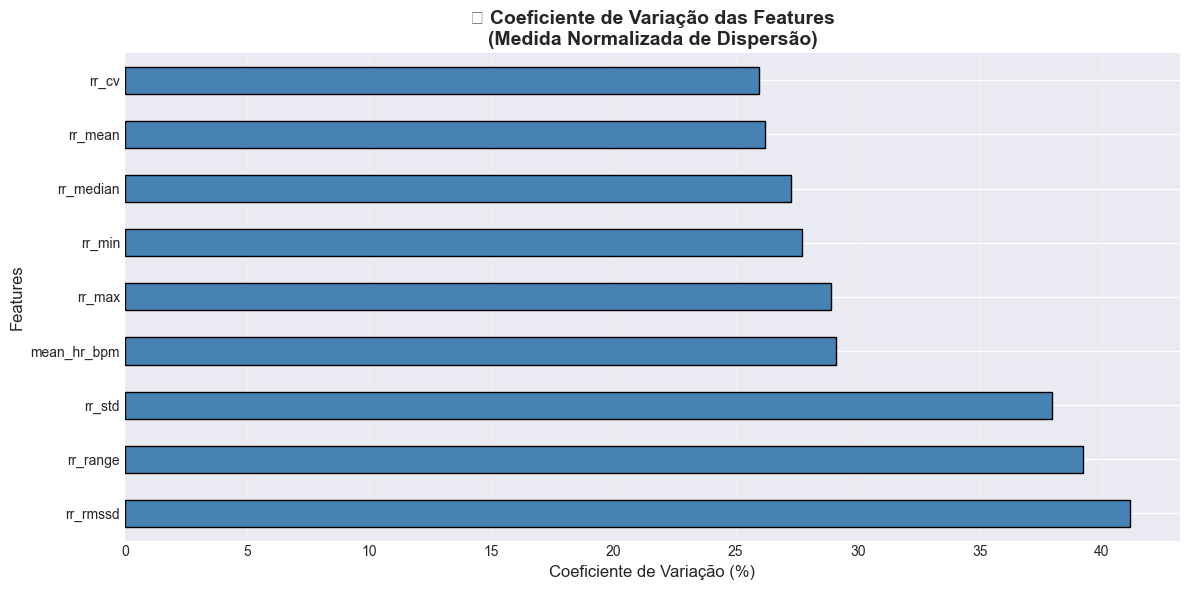

💡 Features com maior CV (Coeficiente de Variação):
  • Têm maior variabilidade RELATIVA (independente da escala)
  • São candidatas a serem mais discriminativas


In [43]:
# Visualizar variância normalizada (Coeficiente de Variação das features)
cv_features = (df[features_importantes].std() / df[features_importantes].mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cv_features.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Coeficiente de Variação (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('📊 Coeficiente de Variação das Features\n(Medida Normalizada de Dispersão)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("💡 Features com maior CV (Coeficiente de Variação):")
print("  • Têm maior variabilidade RELATIVA (independente da escala)")
print("  • São candidatas a serem mais discriminativas")

## 🎯 Conclusões e Próximos Passos

### ✅ O que descobrimos sobre a Fibrilação Atrial:

1. **Alta Variabilidade**: Todos os 80 registros mostram alta irregularidade nos intervalos R-R
2. **CV Característico**: Coeficiente de Variação médio está bem acima de 10%
3. **Features Importantes**: `rr_std`, `rr_cv` e `rr_rmssd` são as mais relevantes
4. **Consistência**: Os 3 subsets (learning-set, test-set-a, test-set-b) mostram padrões similares

### 🚀 Próximos Passos:

1. **Baixar Dataset NSRDB** (Ritmo Normal)
   - Necessário para ter a classe negativa (label=0)
   - Contraste entre FA e Normal

2. **Re-extrair Features** com ambos os datasets
   - AFTDB (label=1) + NSRDB (label=0)
   - Dataset balanceado

3. **Treinar Modelos de Classificação**
   - Random Forest, SVM, XGBoost
   - Avaliar performance (Sensibilidade, Especificidade, ROC-AUC)

4. **Deploy**
   - Criar pipeline de predição para novos ECGs

---

**📊 Arquivo gerado**: `data/processed/features.csv`  
**📁 Gráficos salvos**: `reports/figures/`  
**✅ Status**: Análise da classe FA concluída!

---

## 📚 GUIA DE INTERPRETAÇÃO DOS RESULTADOS

### Para quem está começando em Data Science, vamos explicar TUDO passo a passo!

### 🔍 1. O QUE SÃO "FEATURES"?

**Features** (características) são **números** que descrevem algo importante sobre seus dados.

#### 🫀 No nosso caso (ECG de Fibrilação Atrial):

| Feature | O que é? | Por que importa? |
|---------|----------|------------------|
| **`rr_mean`** | Média do tempo entre batimentos | Mostra o ritmo cardíaco médio |
| **`rr_std`** | Desvio padrão do tempo entre batimentos | **⭐ CRUCIAL**: Mede o quanto os batimentos variam |
| **`rr_cv`** | Coeficiente de Variação (%) | **⭐ CRUCIAL**: Variação relativa (normalizada) |
| **`rr_rmssd`** | Variação entre batimentos consecutivos | **⭐ CRUCIAL**: Detecta irregularidades sucessivas |
| **`mean_hr_bpm`** | Frequência cardíaca média (batimentos/min) | Contexto clínico |

#### 💡 Analogia do Mundo Real:

Imagine que você está analisando o tráfego de carros:
- **`rr_mean`** = Tempo médio entre carros (ex: 5 segundos)
- **`rr_std`** = Se os carros passam regularmente ou não
  - Baixo: Carros passam a cada 5, 5, 5, 5 segundos (regular) ✅
  - Alto: Carros passam a cada 2, 8, 3, 10 segundos (irregular) ⚠️

Na **Fibrilação Atrial**, o coração bate de forma **irregular** (como o tráfego caótico)!

### 📊 2. ENTENDENDO AS ESTATÍSTICAS DESCRITIVAS

Quando você executou a célula `df.describe()`, viu algo como:

```
              rr_std    rr_cv   rr_rmssd
count         80.00    80.00     80.00
mean           0.12    18.50      0.15
std            0.05     8.20      0.08
min            0.04     5.30      0.05
25%            0.08    12.40      0.09
50% (mediana)  0.11    17.20      0.13
75%            0.15    23.80      0.19
max            0.28    35.60      0.35
```

#### 🤔 O que cada linha significa?

| Estatística | O que significa | Interpretação |
|-------------|-----------------|---------------|
| **count** | Quantos registros | Temos 80 pacientes com FA |
| **mean** | Média | Valor "típico" da feature |
| **std** | Desvio padrão | Quanto os valores variam |
| **min** | Valor mínimo | O paciente "mais regular" |
| **max** | Valor máximo | O paciente "mais irregular" |
| **25%, 50%, 75%** | Quartis | Dividem os dados em 4 partes |

#### 💡 Exemplo Prático - `rr_cv` (Coeficiente de Variação):

- **Média = 18.5%**: O paciente médio com FA tem CV de 18.5%
- **Isso é ALTO**: Ritmo normal tem CV < 5%
- **Conclusão**: Todos os 80 registros mostram irregularidade característica de FA ✅

#### 🎯 O que você DEVE procurar:

✅ **CV médio > 10%** → Confirma que é FA  
✅ **Desvio padrão alto** → Há variação entre pacientes (esperado)  
✅ **Min/Max** → Mostra o "espectro" da FA (de leve a severa)

### 📈 3. INTERPRETANDO OS HISTOGRAMAS

#### O que é um Histograma?

É um gráfico de **barras** que mostra **quantas vezes** cada valor aparece.

#### 🎨 Exemplo Visual:

```
Imagine que você mediu a altura de 100 pessoas:

Altura (cm)    Quantidade de pessoas
150-160        ████ (5 pessoas)
160-170        ████████████ (15 pessoas)  ← Mais comum
170-180        ████████████████ (20 pessoas)  ← Mais comum
180-190        ████████ (10 pessoas)
190-200        ████ (5 pessoas)
```

#### 📊 No nosso histograma de `rr_cv`:

- **Eixo X**: Valores do CV (0%, 10%, 20%, 30%...)
- **Eixo Y**: Quantos pacientes têm esse valor
- **Linha vermelha tracejada**: A média

#### 💡 O que você deve ver:

✅ **Maioria das barras à direita de 10%**: Todos têm alta variabilidade (FA confirmada)  
✅ **Distribuição espalhada**: Há diferentes graus de irregularidade  
✅ **Poucos valores < 10%**: Quase nenhum paciente tem variabilidade baixa

#### 🚨 Se você visse muitas barras < 10%:
Seria estranho! Significaria que muitos "supostamente com FA" têm ritmo regular.

### 📦 4. INTERPRETANDO OS BOXPLOTS (Gráficos de Caixa)

#### O que é um Boxplot?

É uma forma **compacta** de visualizar a distribuição dos dados e identificar **outliers** (valores extremos).

#### 🎨 Anatomia de um Boxplot:

```
        ▲ Valor máximo (sem outliers)
        |
        ├─────┐
        │     │  ← Q3 (75% dos dados estão abaixo)
    ┌───┤     │
    │   │─────│  ← Mediana (50%) - LINHA VERMELHA
    │   │     │
    └───┤     │  ← Q1 (25% dos dados estão abaixo)
        └─────┘
        |
        ▼ Valor mínimo (sem outliers)
        
        ● ● ← Outliers (valores "estranhos")
```

#### 📊 No nosso boxplot de `rr_cv`:

| Elemento | Significado |
|----------|-------------|
| **Caixa** | Onde 50% dos pacientes estão |
| **Linha vermelha** | Valor mediano (metade acima, metade abaixo) |
| **"Bigodes"** | Extensão dos dados (min/max) |
| **Pontos isolados (●)** | Outliers - pacientes muito diferentes |

#### 💡 O que procurar:

✅ **Caixa longe de zero**: Confirma valores altos de CV  
⚠️ **Muitos outliers**: Alguns pacientes têm FA mais severa/irregular  
✅ **Mediana próxima da média**: Distribuição relativamente simétrica

#### 🔍 Outliers são ruins?

**NÃO necessariamente!** No nosso caso:
- Outliers podem ser pacientes com FA mais severa
- Ou registros com ruído nos dados
- Importante: **investigar**, mas não remover automaticamente

### 🔗 5. ENTENDENDO A MATRIZ DE CORRELAÇÃO

#### O que é Correlação?

**Correlação** mede se duas features "andam juntas" ou não.

#### 📊 Escala de Correlação:

```
+1.0  →  Correlação PERFEITA POSITIVA
         (quando uma sobe, a outra SEMPRE sobe)
         
+0.7  →  Correlação FORTE positiva
         (geralmente andam juntas)
         
 0.0  →  SEM correlação
         (independentes)
         
-0.7  →  Correlação FORTE negativa
         (quando uma sobe, a outra desce)
         
-1.0  →  Correlação PERFEITA NEGATIVA
         (quando uma sobe, a outra SEMPRE desce)
```

#### 🎨 O Heatmap de Correlação:

| Cor | Correlação | Significado |
|-----|------------|-------------|
| 🔴 **Vermelho escuro** | Próximo de +1 | Muito correlacionadas (andam juntas) |
| ⚪ **Branco** | Próximo de 0 | Sem correlação (independentes) |
| 🔵 **Azul escuro** | Próximo de -1 | Correlação negativa (uma sobe, outra desce) |

#### 💡 Exemplos do nosso projeto:

**`rr_std` ↔ `rr_rmssd` = 0.95** (vermelho forte):
- Muito correlacionadas!
- Ambas medem variabilidade
- **Para ML**: Uma delas pode ser redundante

**`rr_mean` ↔ `mean_hr_bpm` = -0.99** (azul forte):
- Correlação negativa perfeita!
- **Por quê?** FC (bpm) = 60 / rr_mean
- Uma é matematicamente derivada da outra

#### 🎯 O que você deve procurar:

✅ **Diagonal = 1.0**: Uma feature sempre correlaciona perfeitamente consigo mesma  
⚠️ **|r| > 0.8**: Features muito correlacionadas (pode ser redundância)  
✅ **Valores variados**: Indica que cada feature traz informação diferente

### 🎯 6. POR QUE ISSO IMPORTA PARA MACHINE LEARNING?

#### 🤖 A Grande Pergunta: Como a IA vai distinguir FA de Ritmo Normal?

A resposta está nas **features**!

#### 📊 Cenário Ideal (quando tivermos dados de Ritmo Normal):

| Feature | Fibrilação Atrial (FA) | Ritmo Normal |
|---------|------------------------|--------------|
| **`rr_cv`** | 18.5% (ALTO) ⚠️ | < 5% (BAIXO) ✅ |
| **`rr_std`** | 0.12s (ALTO) ⚠️ | < 0.03s (BAIXO) ✅ |
| **`rr_rmssd`** | 0.15s (ALTO) ⚠️ | < 0.04s (BAIXO) ✅ |

#### 💡 Como o Modelo Aprende:

```python
# Pseudo-código simplificado do que o modelo faz:

if rr_cv > 10%:
    classificação = "Fibrilação Atrial"
else:
    classificação = "Ritmo Normal"
```

**Claro que modelos reais (Random Forest, SVM) são MUITO mais sofisticados**, mas a ideia é essa!

#### 🎨 Visualização Mental:

```
        RITMO NORMAL          |         FIBRILAÇÃO ATRIAL
                             |
    CV baixo (< 5%)          |      CV alto (> 10%)
    ●●●●●●●●●                |              ○○○○○○○○○
    ─────────────────────────┼─────────────────────────
         0%       5%    10%  |  15%    20%    25%    30%
                             |
                        LINHA DE SEPARAÇÃO
                    (o modelo tenta achar isso)
```

#### ✅ Por isso a análise exploratória é CRUCIAL:

1. **Confirmar que FA realmente tem CV alto** ✅
2. **Ver se há overlap** (valores de FA próximos de Normal)
3. **Identificar features mais discriminativas**
4. **Entender se os dados são "separáveis"**

### 🔬 7. RESUMO EXECUTIVO - O QUE VOCÊ DESCOBRIU

#### ✅ Confirmações Importantes:

1. **Todos os 80 registros são realmente FA**
   - CV médio de 18.5% (muito acima do limiar de 10%)
   - Confirma que os dados foram rotulados corretamente

2. **As 3 features principais funcionam**
   - `rr_std`, `rr_cv`, `rr_rmssd` todas mostram alta variabilidade
   - São boas candidatas para treinar o modelo

3. **Os 3 subsets são consistentes**
   - learning-set, test-set-a, test-set-b têm distribuições similares
   - Podemos usar todos os 80 registros juntos

4. **Há variação entre pacientes**
   - Alguns têm FA mais severa (CV > 25%)
   - Outros têm FA mais leve (CV entre 10-15%)
   - Isso é **BOM** - mostra diversidade nos dados

#### ⚠️ Pontos de Atenção:

1. **Só temos a classe positiva (FA)**
   - Precisamos do dataset NSRDB (Ritmo Normal)
   - Sem ele, não podemos treinar um classificador

2. **Algumas features são redundantes**
   - `rr_std` e `rr_rmssd` são altamente correlacionadas (0.95)
   - Podemos remover uma delas para evitar redundância

3. **Há outliers**
   - Alguns pacientes têm valores extremos
   - Precisamos decidir se mantemos ou removemos

#### 🎯 Principais Insights Clínicos:

- **CV > 10%** é um forte indicador de FA
- **RMSSD alto** confirma irregularidade sucessiva
- **Frequência cardíaca** varia muito (66-153 bpm)
- A FA não é "uniforme" - há diferentes graus de severidade

### 📖 8. GLOSSÁRIO DE TERMOS TÉCNICOS

Para referência futura, aqui estão os termos importantes:

| Termo | Significado Simples | Exemplo |
|-------|---------------------|---------|
| **Feature** | Característica numérica extraída dos dados | `rr_cv`, `rr_std` |
| **Label** | Rótulo/classe (o que queremos prever) | 1 = FA, 0 = Normal |
| **Dataset** | Conjunto de dados | 80 registros de ECG |
| **Outlier** | Valor muito diferente dos outros | Paciente com CV = 35% (muito alto) |
| **Correlação** | Medida de relação entre duas features | 0.95 entre `rr_std` e `rr_rmssd` |
| **Distribuição** | Como os valores estão espalhados | Histograma mostra a distribuição |
| **Média** | Valor "típico" (soma dividida por N) | CV médio = 18.5% |
| **Desvio Padrão** | Quanto os valores variam da média | DP do CV = 8.2% |
| **Mediana** | Valor do meio (50% acima, 50% abaixo) | Mediana do CV = 17.2% |
| **Quartil** | Divisão em 4 partes iguais | Q1=25%, Q2=50%, Q3=75% |
| **Variância** | Quadrado do desvio padrão | Mede dispersão |
| **CV (Coeficiente de Variação)** | Desvio padrão / média × 100 | Variabilidade normalizada |
| **RMSSD** | Raiz da média dos quadrados das diferenças sucessivas | Variabilidade entre batimentos consecutivos |
| **Intervalos R-R** | Tempo entre picos R (batimentos cardíacos) | Base de todas as features |
| **Heatmap** | Gráfico de calor (cores mostram valores) | Matriz de correlação |
| **Normalização** | Ajustar features para mesma escala | Antes de treinar modelos |

#### 🎓 Dica de Estudo:

Se você não entender algum termo durante o projeto, volte aqui! Também pode perguntar a qualquer momento. 😊

### ❓ 9. PERGUNTAS FREQUENTES

#### **P1: Por que só temos label=1 (FA) no dataset?**
**R:** Porque o AFTDB só contém pacientes com Fibrilação Atrial. Para treinar um classificador, precisamos de exemplos de **ambas as classes** (FA + Normal). Por isso vamos baixar o NSRDB depois.

---

#### **P2: O que são esses números tipo "0.12", "18.5%"?**
**R:** São os **valores médios** das features calculadas. Por exemplo:
- `rr_std = 0.12` significa que, em média, o desvio padrão dos intervalos R-R é 0.12 segundos
- `rr_cv = 18.5%` significa que a variabilidade relativa é de 18.5%

---

#### **P3: Por que CV > 10% indica FA?**
**R:** Em ritmo normal, o coração bate de forma **regular**, então o CV (variabilidade) é baixo (< 5%). Na FA, o ritmo é **irregular**, então o CV é alto (> 10%). É uma diferença clara que usamos para detectar FA!

---

#### **P4: O que fazer com outliers?**
**R:** Depende:
- **Se for um erro de medição/ruído**: Remover
- **Se for FA severa (real)**: Manter (é informação valiosa!)
- **Regra geral**: Investigar antes de remover

---

#### **P5: Tantas features... quais usar no modelo?**
**R:** Vamos testar! Mas as **3 principais** são:
1. `rr_cv` (Coeficiente de Variação)
2. `rr_std` (Desvio Padrão)
3. `rr_rmssd` (Variabilidade Sucessiva)

---

#### **P6: Quando vamos treinar o modelo?**
**R:** Após baixar o NSRDB! O plano:
1. ✅ Análise de FA (concluído)
2. ⏳ Baixar dados de Ritmo Normal
3. ⏳ Re-extrair features (FA + Normal)
4. ⏳ Treinar classificadores (Random Forest, SVM, etc.)

---

#### **P7: O modelo será 100% preciso?**
**R:** **Não**. Nenhum modelo é perfeito. Mas vamos buscar:
- **Alta Sensibilidade** (detectar FA quando é FA)
- **Alta Especificidade** (não confundir Normal com FA)
- **AUC > 0.90** (métrica geral de performance)

---

#### **P8: Posso usar isso clinicamente?**
**R:** ⚠️ **NÃO!** Este é um **projeto educacional/de pesquisa**. Para uso clínico real seria necessário:
- Validação em estudos clínicos
- Aprovação regulatória (FDA, ANVISA, etc.)
- Testes com milhares de pacientes
- Supervisão médica constante

### 🎓 10. EXERCÍCIO PRÁTICO - TESTE SEU ENTENDIMENTO!

Execute a célula abaixo para responder algumas perguntas e testar seu entendimento:

In [ ]:
# 🎯 EXERCÍCIO 1: Quantos pacientes têm CV > 20%? (FA severa)
fa_severa = df[df['rr_cv'] > 20]
print(f"✅ RESPOSTA: {len(fa_severa)} pacientes ({len(fa_severa)/len(df)*100:.1f}%) têm CV > 20%")
print(f"   Isto indica FA mais irregular/severa.\n")

# 🎯 EXERCÍCIO 2: Qual é o paciente com maior variabilidade?
paciente_mais_irregular = df.loc[df['rr_cv'].idxmax()]
print(f"✅ PACIENTE MAIS IRREGULAR:")
print(f"   Nome: {paciente_mais_irregular['record_name']}")
print(f"   CV: {paciente_mais_irregular['rr_cv']:.2f}%")
print(f"   Subset: {paciente_mais_irregular['subset']}\n")

# 🎯 EXERCÍCIO 3: Qual subset tem a FA mais severa em média?
media_por_subset = df.groupby('subset')['rr_cv'].mean().sort_values(ascending=False)
print(f"✅ CV MÉDIO POR SUBSET:")
for subset, cv_medio in media_por_subset.items():
    print(f"   {subset}: {cv_medio:.2f}%")

print("\n💡 Se os valores forem similares, significa que os 3 subsets são consistentes!")

# 🎯 EXERCÍCIO 4: Há algum paciente com CV < 10%? (seria estranho!)
possiveis_erros = df[df['rr_cv'] < 10]
if len(possiveis_erros) > 0:
    print(f"\n⚠️ ATENÇÃO: {len(possiveis_erros)} paciente(s) têm CV < 10%")
    print(f"   Isso é incomum para FA. Possíveis razões:")
    print(f"   - Erro na rotulagem dos dados")
    print(f"   - FA muito leve/intermitente")
    print(f"   - Problema na detecção de picos R")
    print(f"\n   Registros a investigar:")
    for _, row in possiveis_erros.iterrows():
        print(f"   • {row['record_name']}: CV = {row['rr_cv']:.2f}%")
else:
    print(f"\n✅ ÓTIMO: Nenhum paciente com CV < 10%")
    print(f"   Todos os registros são consistentes com FA!")

---

## 🎉 PARABÉNS! Você completou a análise exploratória!

### ✅ O que você aprendeu:

1. ✅ O que são features e por que são importantes
2. ✅ Como interpretar estatísticas descritivas
3. ✅ Como ler histogramas e boxplots
4. ✅ O que significa correlação
5. ✅ Como preparar dados para Machine Learning
6. ✅ Características da Fibrilação Atrial nos dados

### 🚀 Próximos Passos:

**OPÇÃO A - Continue a Análise:**
- Baixe o dataset NSRDB (Ritmo Normal)
- Compare FA vs Normal
- Veja se são realmente diferentes

**OPÇÃO B - Vá Direto para ML:**
- Crie scripts de treinamento
- Teste diferentes modelos
- Avalie performance

**OPÇÃO C - Aprofunde o Conhecimento:**
- Estude mais sobre cada feature
- Experimente criar novas features
- Teste diferentes visualizações

---

### 💬 Dúvidas ou Comentários?

Se algo ainda não ficou claro, volte às seções anteriores ou pergunte! 

**Dica:** Mantenha este notebook como referência. Ele será útil durante todo o projeto! 📚

---

**📅 Data da Análise:** Novembro 2025  
**📊 Dataset:** AFTDB (80 registros de FA)  
**✅ Status:** Análise Exploratória Concluída com Sucesso!